# **Praktikum Kecerdasan Buatan - Post Test 8 - Deep Learning**
###### Tjeng, Ivan Cahyadi 2009106146

## **Import Libraries**

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## **Load Data**

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.cifar10.load_data()

In [3]:
# Cek jumlah data train dan test
print(f'panjang x train: {len(x_train_raw)}',
      f'panjang y train: {len(y_train_raw)}',
      f'panjang x test: {len(x_test_raw)}',
      f'panjang y test: {len(y_test_raw)}',
      sep='\n')

panjang x train: 50000
panjang y train: 50000
panjang x test: 10000
panjang y test: 10000


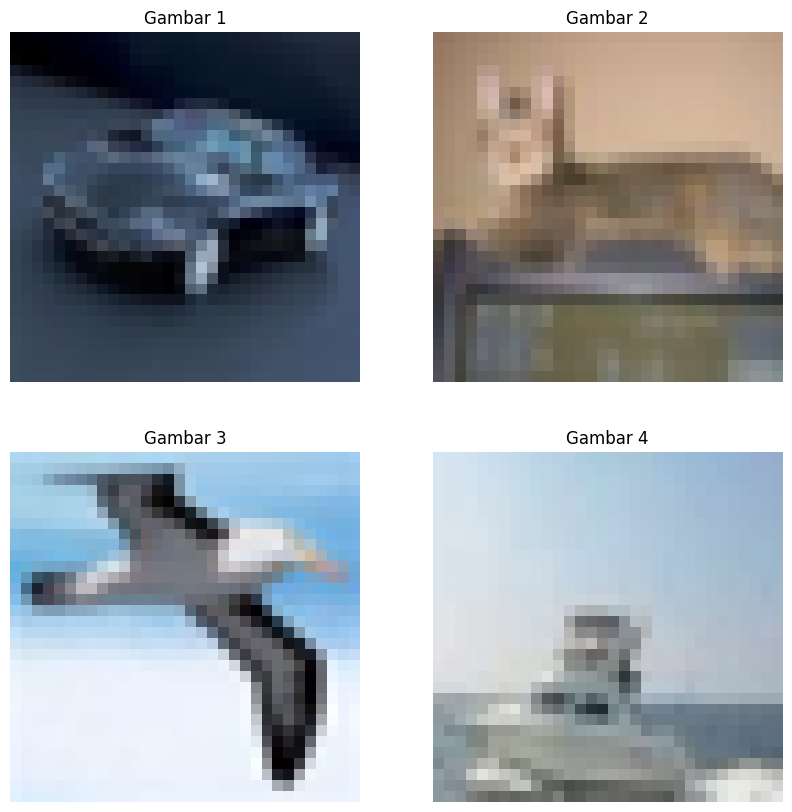

In [4]:
# Menampilkan sampel gambar
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)

plt.imshow(x_train_raw[38174])
plt.axis('off')
plt.title("Gambar 1")

fig.add_subplot(2, 2, 2)

plt.imshow(x_train_raw[8162])
plt.axis('off')
plt.title("Gambar 2")

fig.add_subplot(2, 2, 3)

plt.imshow(x_train_raw[41721])
plt.axis('off')
plt.title("Gambar 3")

fig.add_subplot(2, 2, 4)

plt.imshow(x_train_raw[100])
plt.axis('off')
plt.title("Gambar 4")

plt.show()

In [5]:
# Encode label
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [6]:
# Cek dimensi data train
x_train_raw.shape

(50000, 32, 32, 3)

In [7]:
# Ubah dimensi array image menjadi 1D
x_train = tf.reshape(x_train_raw, [50000, 3072])
x_test = tf.reshape(x_test_raw, [10000, 3072])

In [8]:
# Menormalkan nilai piksel gambar
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

## **Modeling**

In [9]:
# Bangun arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=3072),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(256, activation='swish'),
    tf.keras.layers.Dense(256, activation='hard_sigmoid'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [10]:
# Ringkasan detail parameter layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 626,314
Trainable params: 626,314
Non-trai

In [11]:
# Konfigurasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
# Latih model
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    steps_per_epoch=15,
    validation_data=(x_test, y_test)
)

Epoch 1/30
15/15 [==============================] - 2s 108ms/step - loss: 2.1885 - accuracy: 0.1879 - val_loss: 2.0379 - val_accuracy: 0.2494
Epoch 2/30
15/15 [==============================] - 1s 94ms/step - loss: 1.9727 - accuracy: 0.2789 - val_loss: 1.9054 - val_accuracy: 0.3067
Epoch 3/30
15/15 [==============================] - 1s 97ms/step - loss: 1.8652 - accuracy: 0.3254 - val_loss: 1.8181 - val_accuracy: 0.3474
Epoch 4/30
15/15 [==============================] - 1s 94ms/step - loss: 1.7987 - accuracy: 0.3537 - val_loss: 1.7544 - val_accuracy: 0.3712
Epoch 5/30
15/15 [==============================] - 1s 94ms/step - loss: 1.7678 - accuracy: 0.3637 - val_loss: 1.7235 - val_accuracy: 0.3777
Epoch 6/30
15/15 [==============================] - 1s 99ms/step - loss: 1.7057 - accuracy: 0.3868 - val_loss: 1.6765 - val_accuracy: 0.4011
Epoch 7/30
15/15 [==============================] - 2s 122ms/step - loss: 1.6711 - accuracy: 0.4010 - val_loss: 1.6432 - val_accuracy: 0.4130
Epoch 8/30


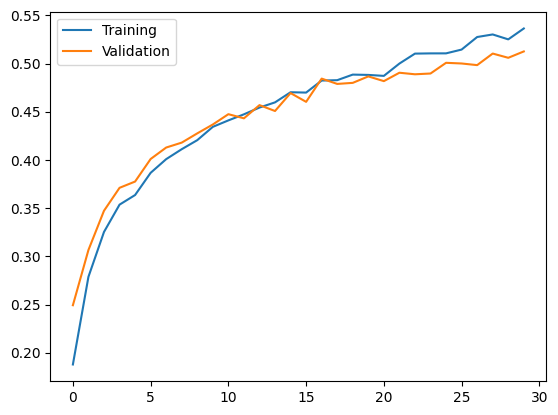

In [13]:
# Grafik learning rate
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()